# 🐍🐼 Python-Pandas: Transform Your DataFrame into SQL with pd.io.sql!

📊 What if you could combine the flexibility of pandas with the power of SQL? Today, I’ll show you how.  
👉 Working with databases is an essential skill for any data professional. With pandas, you can interact directly with SQL databases to query, analyze, and transform data—all within Python! This unlocks countless possibilities, from quick analyses to seamless business workflows.

## 💻 Practical Example:
📥 Dataset: We use the titanic dataset from the seaborn library. We’ll create an SQLite database, perform SQL queries, and merge results with advanced pandas transformations.

## 🔗 Real-World Impact:
💼 Uncover hidden data patterns by combining SQL and pandas in exploratory analysis.  
📈 Apply this approach to optimize processes like customer segmentation or automated reporting.

## 🌟 Reflection:
🤔 How would you integrate SQL into your projects to solve complex data challenges? Share your thoughts in the comments. 🚀

📈 **#DataScience** **#Python** **#Pandas** **#SQL** **#Database** **#DataAnalysis** **#MachineLearning** **#AI**

### [GitHub Repository: PyForAll](https://github.com/jcombari/PyForAll)

---

# 🐍🐼 Python-Pandas: ¡Transforma tu DataFrame en SQL con pd.io.sql!

📊 ¿Qué pasaría si pudieras combinar la flexibilidad de pandas con el poder de SQL? Hoy te mostraré cómo hacerlo realidad.  
👉 Trabajar con bases de datos es una habilidad esencial para cualquier profesional de datos. Con pandas, puedes interactuar directamente con bases de datos SQL para consultar, analizar y transformar datos, ¡todo sin salir de Python! Esto abre un mundo de posibilidades, desde análisis rápido hasta integración en flujos de trabajo de negocio.

## 💻 Ejemplo práctico:
📥 Dataset: Utilizamos el conjunto de datos titanic incluido en la biblioteca seaborn. A partir de este, crearemos una base de datos SQLite, realizaremos consultas SQL, y combinaremos resultados con transformaciones avanzadas de pandas.

## 🔗 Impacto en el mundo real:
💼 Descubre patrones de datos ocultos al combinar SQL y pandas en análisis exploratorio.  
📈 Integra este enfoque para optimizar procesos como segmentación de clientes o generación de reportes automatizados.

## 🌟 Reflexión:
🤔 ¿Cómo incorporarías SQL en tus proyectos para resolver problemas complejos de datos? Compárteme tus ideas en los comentarios. 🚀

📈 **#CienciaDeDatos** **#Python** **#Pandas** **#SQL** **#BaseDeDatos** **#AnálisisDeDatos** **#MachineLearning** **#IA**

### [Repositorio GitHub: PyForAll](https://github.com/jcombari/PyForAll)

Full Data from SQL:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  deck  embark_town alive  alone  
0    man           1  None  Southampton    no      0  
1  woman           0     C    Cherbourg   yes      0  
2  woman           0  None  Southampton   yes      1  
3  woman           0     C  Southampton   yes      0  
4    man           1  None  Southampton    no      1  

Survival Rates by Class and Gender:
    pclass     sex  survival_rate
0       1  female       0.968085
1       1    male       0.368852
2       2  female       0.921053
3       2    male     

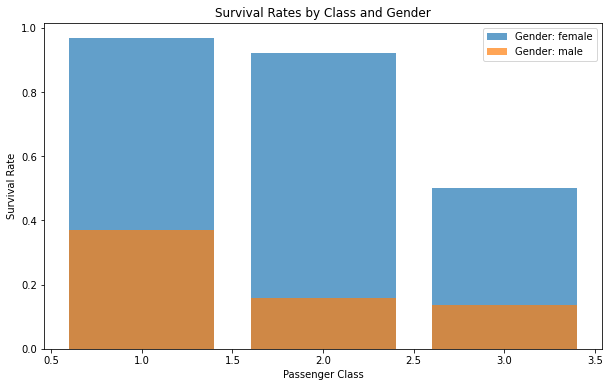

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")

# Connect to an SQLite database (in memory)
conn = sqlite3.connect(":memory:")

# Write the Titanic dataset to SQL
titanic.to_sql("titanic_data", conn, index=False, if_exists="replace")

# Example 1: Read data from the SQL database
query_all = "SELECT * FROM titanic_data"
titanic_sql = pd.read_sql(query_all, conn)
print("Full Data from SQL:\n", titanic_sql.head())

# Example 2: Group by class and gender, and calculate survival rates
query_grouped = """
SELECT 
    pclass, 
    sex, 
    AVG(survived) as survival_rate 
FROM titanic_data
GROUP BY pclass, sex
"""
grouped_df = pd.read_sql(query_grouped, conn)
print("\nSurvival Rates by Class and Gender:\n", grouped_df)

# Example 3: Filter passengers younger than 18 (children)
query_filtered = """
SELECT 
    pclass, 
    sex, 
    survived, 
    age 
FROM titanic_data
WHERE age < 18
"""
filtered_df = pd.read_sql(query_filtered, conn)
print("\nFiltered Data (Children):\n", filtered_df.head())

# Example 4: Merge SQL with pandas for advanced transformations
pandas_grouped = titanic.groupby(["pclass", "sex"]).agg(
    Total_Passengers=("survived", "count"),
    Survival_Rate=("survived", "mean")
).reset_index()

print("\nGrouped Data with pandas:\n", pandas_grouped)

# Example 5: Visualize survival rates
plt.figure(figsize=(10, 6))
for gender in pandas_grouped["sex"].unique():
    subset = pandas_grouped[pandas_grouped["sex"] == gender]
    plt.bar(subset["pclass"], subset["Survival_Rate"], label=f"Gender: {gender}", alpha=0.7)

plt.title("Survival Rates by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend()
plt.show()

# Close the database connection
conn.close()
